# Assignment 3 - Non-Linear Models Abalone Dataset

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

## Exploratory Data Analysis (EDA)

In [2]:
# Display options for better visualization
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.2f}'.format)  # Format float numbers

## Import data

In [3]:
# Step 2: Load the Dataset
data = pd.read_csv('abalone.csv')


In [4]:
# Display the first few rows of the dataset
print("Preview of the Dataset:")
display(data.head())

Preview of the Dataset:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7


In [5]:
# Step 3: Basic Information about the Dataset
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
print("\nStatistical Summary:")
display(data.describe(include='all'))


Statistical Summary:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.52,0.41,0.14,0.83,0.36,0.18,0.24,9.93
std,NaN,0.12,0.10,0.04,0.49,0.22,0.11,0.14,3.22
min,NaN,0.07,0.06,0.00,0.00,0.00,0.00,0.00,1.00
25%,NaN,0.45,0.35,0.12,0.44,0.19,0.09,0.13,8.00
50%,NaN,0.55,0.42,0.14,0.80,0.34,0.17,0.23,9.00
75%,NaN,0.61,0.48,0.17,1.15,0.50,0.25,0.33,11.00


In [7]:
# Step 4: Check for Missing Values
print("\nMissing Values Count:")
missing_values = data.isnull().sum()
display(missing_values)


Missing Values Count:


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

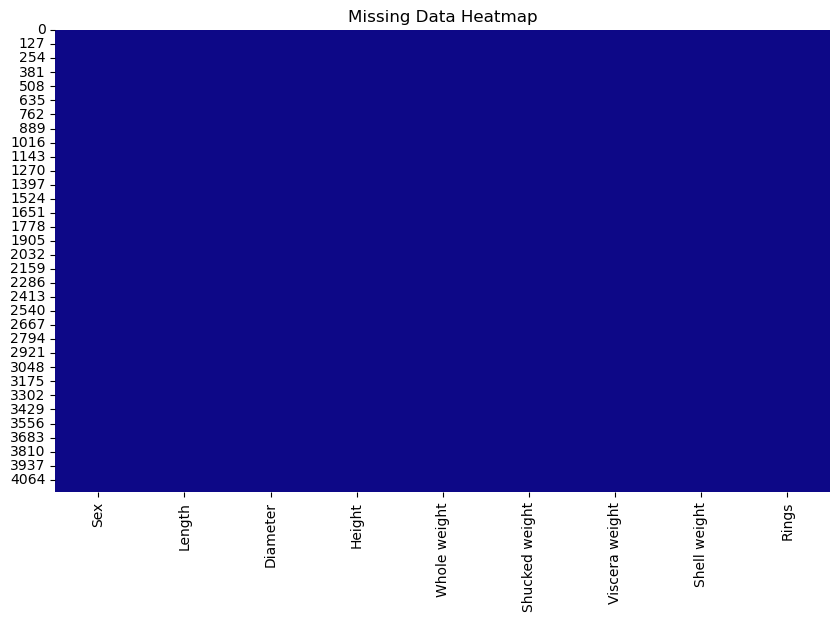

In [8]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='plasma')
plt.title("Missing Data Heatmap")
plt.show()

In [9]:
# Step 5: Check Data Types
print("\nData Types:")
print(data.dtypes)


Data Types:
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object


In [10]:
# Convert categorical columns if necessary
# Example: data['Category'] = data['Category'].astype('category')

In [11]:
# Step 6: Analyze Categorical Variables
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Variables Analysis:")
for col in categorical_cols:
    print(f"\n{col} Value Counts:")
    display(data[col].value_counts())


Categorical Variables Analysis:

Sex Value Counts:


Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


Numerical Variables Analysis:


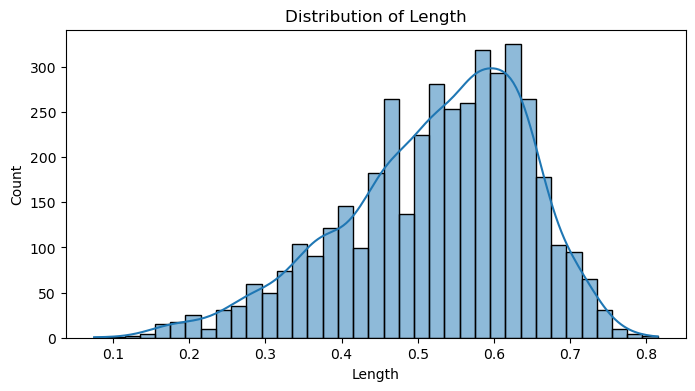

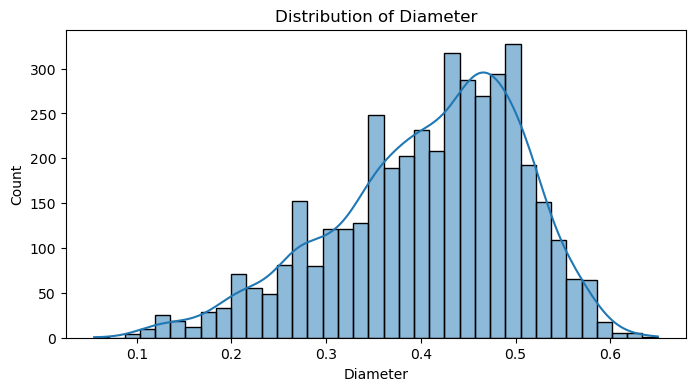

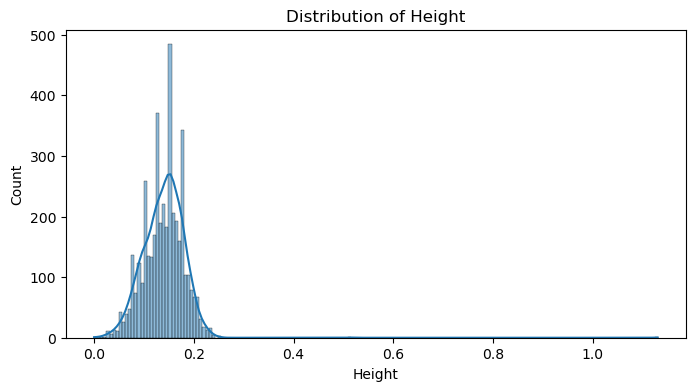

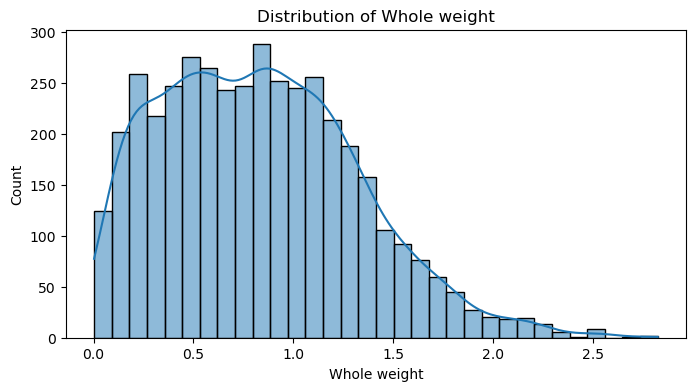

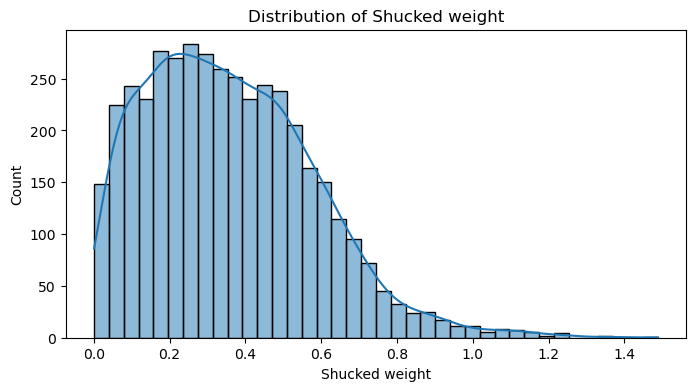

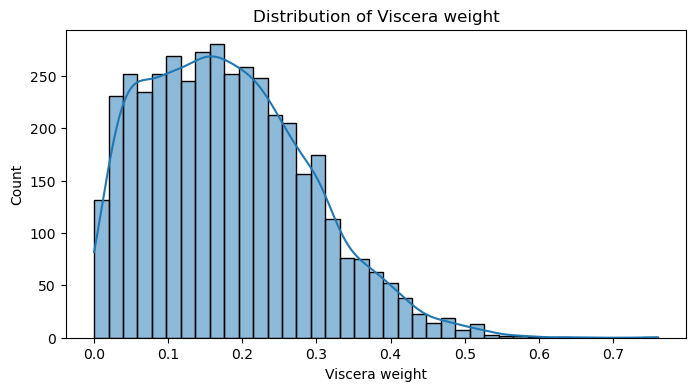

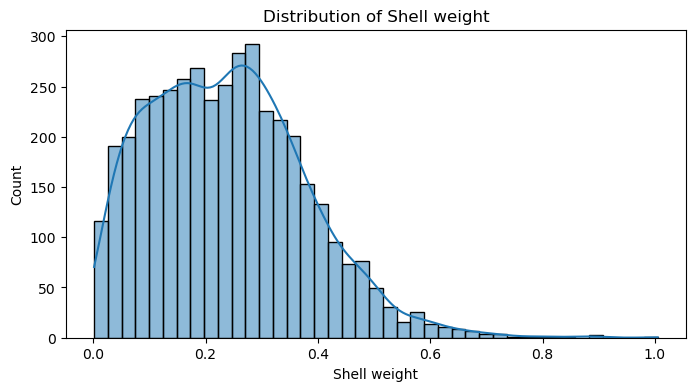

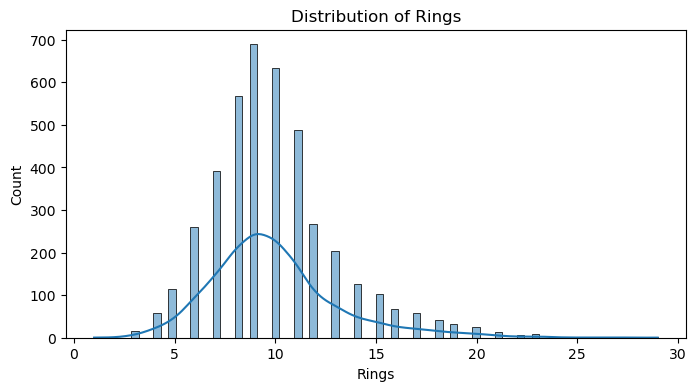

In [12]:
# Step 7: Analyze Numerical Variables
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Variables Analysis:")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


Outliers Analysis:


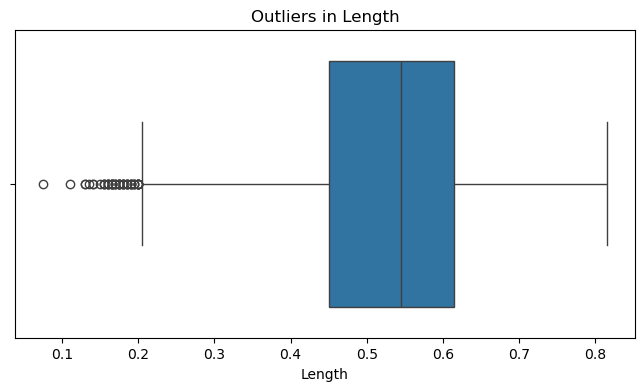

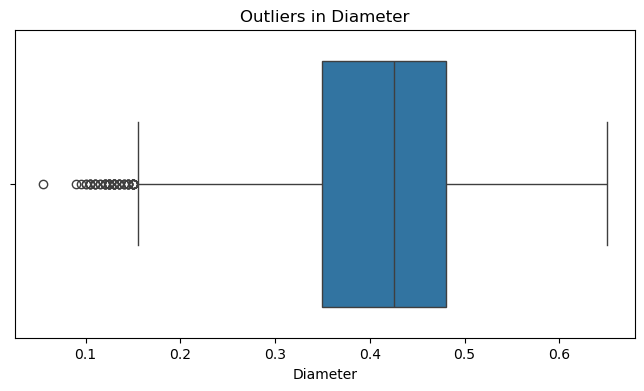

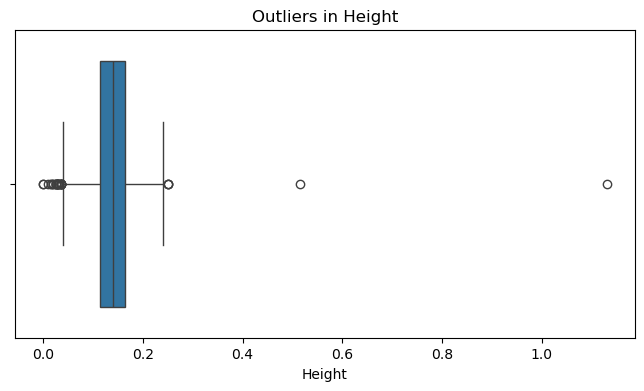

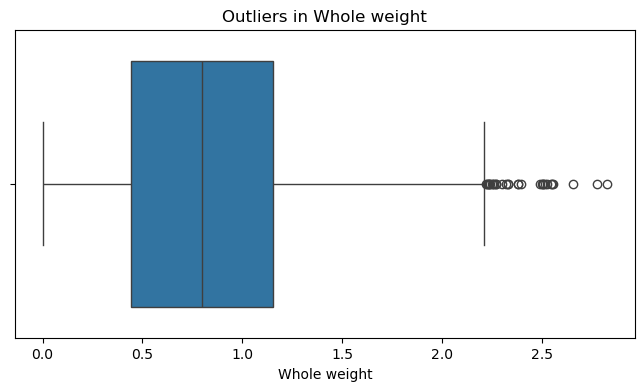

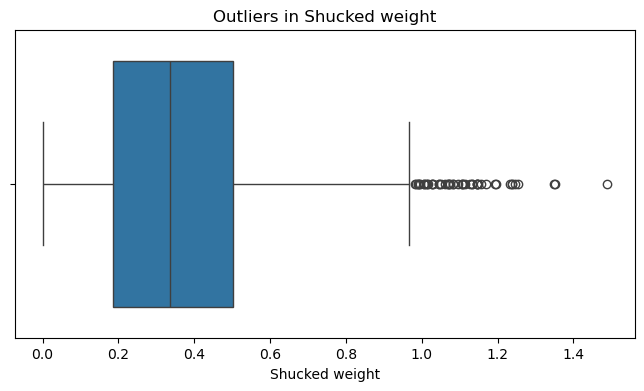

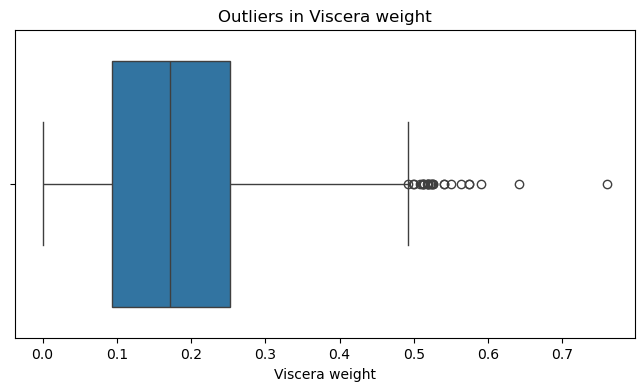

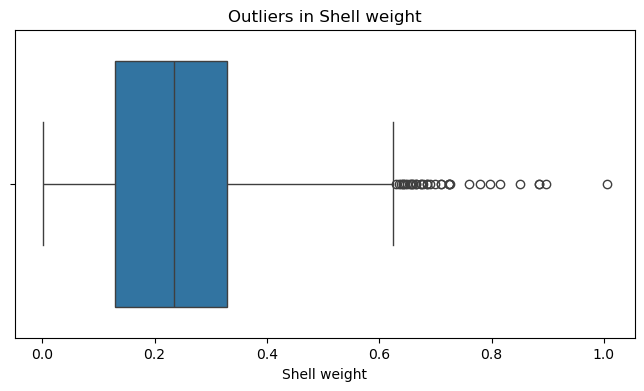

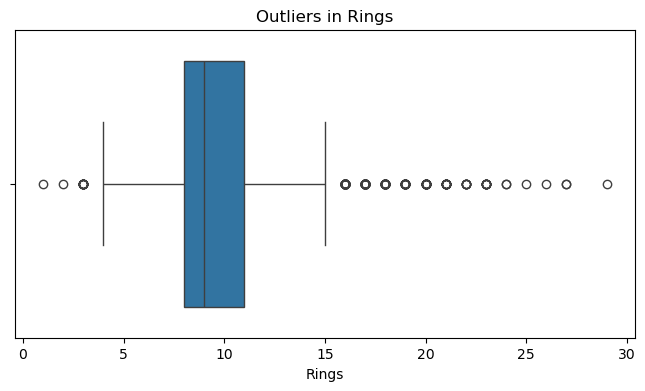

In [13]:
# Step 8: Check for Outliers
print("\nOutliers Analysis:")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [14]:
filtered_data = data.drop(columns=['Sex'])

# Display the resulting dataset
print(filtered_data.head())

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0    0.46      0.36    0.10          0.51            0.22            0.10   
1    0.35      0.27    0.09          0.23            0.10            0.05   
2    0.53      0.42    0.14          0.68            0.26            0.14   
3    0.44      0.36    0.12          0.52            0.22            0.11   
4    0.33      0.26    0.08          0.20            0.09            0.04   

   Shell weight  Rings  
0          0.15     15  
1          0.07      7  
2          0.21      9  
3          0.15     10  
4          0.06      7  



Correlation Matrix:


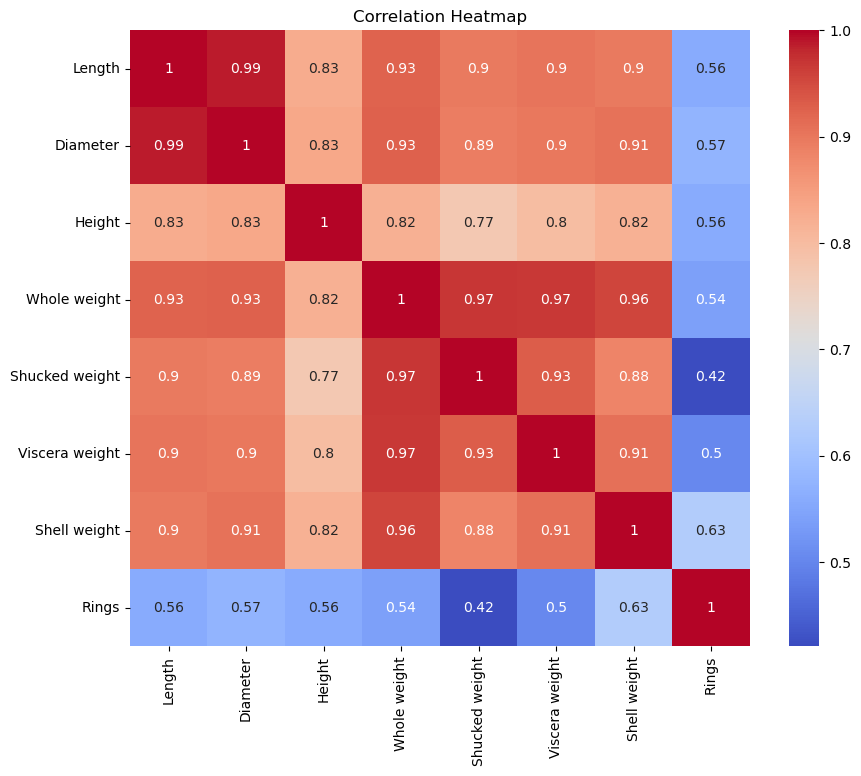

In [15]:
# Step 9: Correlation Analysis
print("\nCorrelation Matrix:")
corr_matrix = filtered_data.corr() # used filtered_data rather that data due to data containing a column with object datatype
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Pairplot for Numerical Variables:


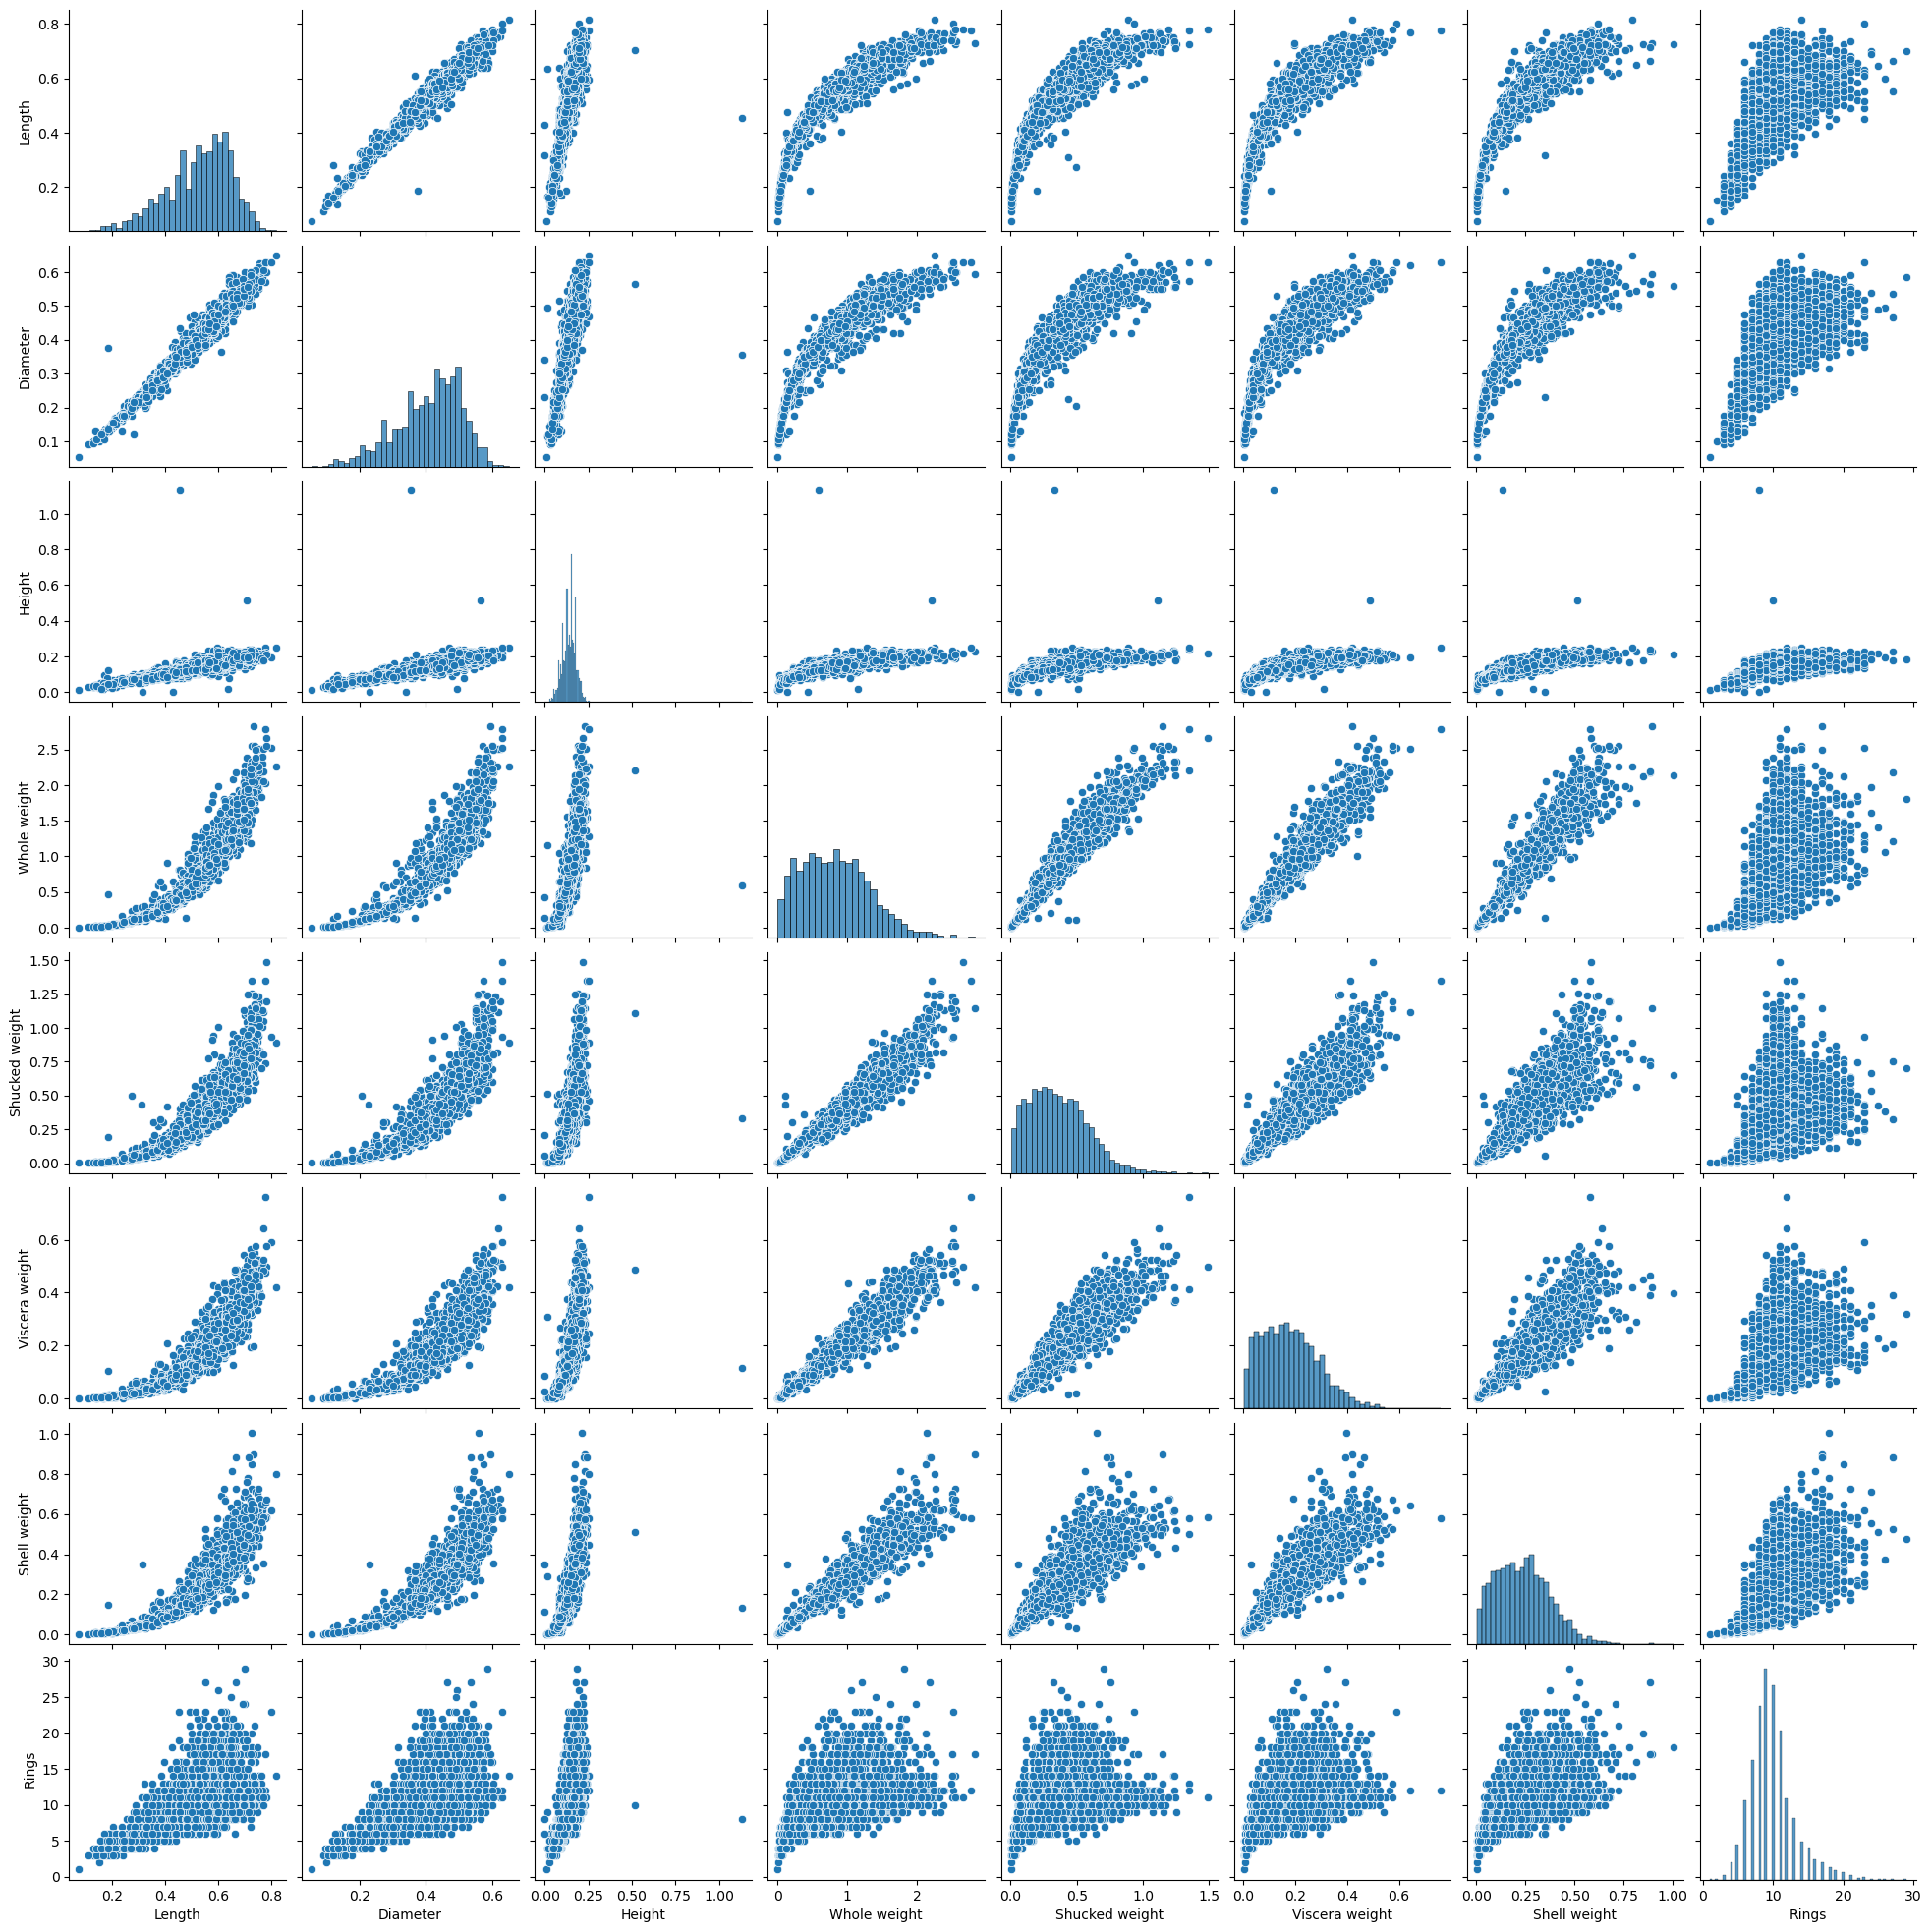

In [16]:
# Step 10: Relationship Between Variables
print("\nPairplot for Numerical Variables:")
sns.pairplot(data[numerical_cols])
plt.show()

In [17]:
# Example: Analyzing relationships between a specific categorical and numerical variable
# Replace 'Category_Column' and 'Numerical_Column' with actual column names
# sns.boxplot(x='Category_Column', y='Numerical_Column', data=data)
# plt.title("Relationship Analysis")
# plt.show()

## Key Observations from EDA

### 1. Dataset Overview
- The dataset contains **4,177 rows** and **9 columns**.
- Most columns are numerical, with 1 categorical variables (Sex).

### 2. Missing Data
- No missing data

### 3. Numerical Variables
- The dataset contains the following numerical variables: Length, Diameter, Height,	Whole weight, Shucked weight, Viscera weight,Shell weight,Rings
 




In [18]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [19]:
features = ["Length","Height"]
X_train = train[features]
X_test = test[features]
y_train = train["Rings"]


# Regularized Model

## Lasso Regression

In [20]:
X = data.drop(columns=['Rings'])
y = data['Rings']

In [21]:
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [22]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Apply Lasso regularization
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [25]:
print("Coefficients:", lasso.coef_)

Coefficients: [ 0.          0.47382873  0.38792762  0.         -1.47419654 -0.
  2.30044358 -0.31613684  0.        ]


# Ridge

In [26]:
# Identify selected features
selected_features = np.where(lasso.coef_ != 0)[0]
print(f"Selected features: {X.columns[selected_features]}")

Selected features: Index(['Diameter', 'Height', 'Shucked weight', 'Shell weight', 'Sex_I'], dtype='object')


In [27]:
# Train a model using selected features
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

In [28]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_selected, y_train)

Ridge()

Coefficients of the Ridge Regression Model:
           Feature  Coefficient
4  Shucked weight       -17.30
6    Shell weight        10.83
2          Height         7.47
1        Diameter         6.68
3    Whole weight         6.58
5  Viscera weight        -5.82
0          Length         2.88
7           Sex_I        -0.79
8           Sex_M         0.07


C:\Users\JasHa\AppData\Local\Temp\ipykernel_18392\1394026083.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette="viridis")


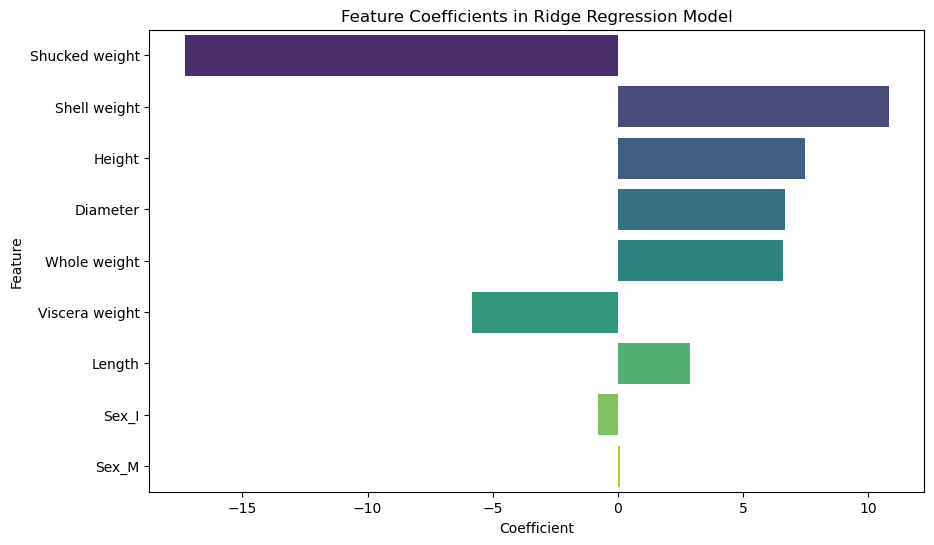

In [29]:

# Train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Coefficients of the model
coefficients = ridge_model.coef_

# Ensure that X.columns and coefficients have the same length
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficients to see the most influential features
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Coefficients of the Ridge Regression Model:\n", coef_df[['Feature', 'Coefficient']])

# Visualize the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette="viridis")
plt.title("Feature Coefficients in Ridge Regression Model")
plt.show()

# Polynomial Regression

Polynomial Regression Metrics (Degree 2):
Train RMSE: 2.05, Test RMSE: 2.20
Train R²: 0.59, Test R²: 0.55


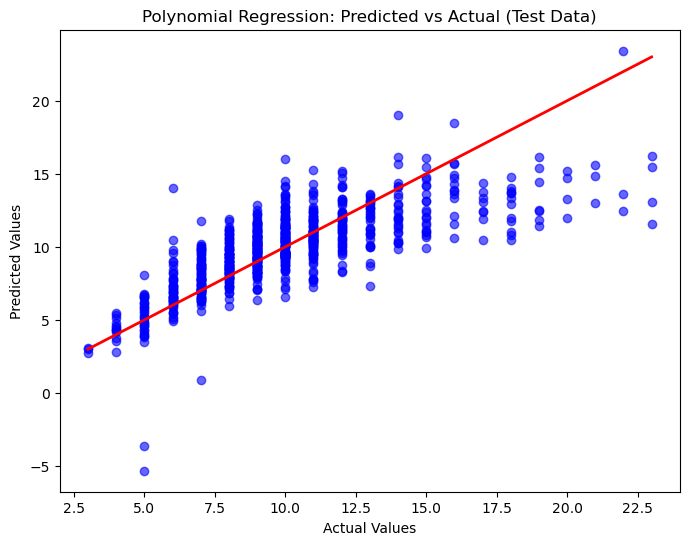

In [30]:

# Standardize the features (important for polynomial regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial transformation (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train a linear regression model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Polynomial Regression Metrics (Degree 2):")
print(f"Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")
print(f"Train R²: {r2_train:.2f}, Test R²: {r2_test:.2f}")

# Visualize Predictions vs Actuals for Test Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Polynomial Regression: Predicted vs Actual (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()



## Polynomial Model using Regularization Techniques to Inform Best Subset Selection

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Load the Abalone dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Combine train and test for preprocessing (One Hot Encoding)
all_data = pd.concat([train.drop('Rings', axis=1, errors='ignore'), test], ignore_index=True)

# One-hot encode the "Sex" column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_sex = encoder.fit_transform(all_data[['Sex']])
encoded_sex_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(['Sex']))
all_data = pd.concat([all_data.drop('Sex', axis=1), encoded_sex_df], axis=1)

# Separate train and test again
X = all_data[:len(train)].copy()
X.columns = X.columns.astype(str)  # Convert train columns to strings
y = train['Rings']
X_test_final = all_data[len(train):].copy()

#Option 1: Keep original column names (Recommended if you don't specifically need string names)
#No changes needed here

#Option 2: Assign correct number of string names (If you need string column names)
#original_columns = X_test_final.columns.tolist()
#if len(original_columns) != len(X_test_final.columns):
#    print("Warning: Number of original column names doesn't match number of columns in X_test_final.")
#X_test_final.columns = original_columns

# Split data (using train set only)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_final_scaled = scaler.transform(X_test_final)

def create_polynomial_model(X, y, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    X_poly_const = sm.add_constant(np.asarray(X_poly))
    model = sm.OLS(np.asarray(y), X_poly_const).fit()
    return model, poly

best_aic = float('inf')
best_bic = float('inf')
best_degree_aic = 0
best_degree_bic = 0
best_model_aic = None
best_model_bic = None
best_poly_aic = None
best_poly_bic = None

for degree in range(1, 6):
    model, poly = create_polynomial_model(X_train_scaled, y_train, degree)
    if model.aic < best_aic:
        best_aic = model.aic
        best_degree_aic = degree
        best_model_aic = model
        best_poly_aic = poly

    if model.bic < best_bic:
        best_bic = model.bic
        best_degree_bic = degree
        best_model_bic = model
        best_poly_bic = poly

print(f"Best AIC: {best_aic} at degree {best_degree_aic}")
print(f"Best BIC: {best_bic} at degree {best_degree_bic}")

# Use best model for prediction
if best_aic < best_bic:
    best_poly = best_poly_aic
    best_model = best_model_aic
else:
    best_poly = best_poly_bic
    best_model = best_model_bic

# Create Polynomial Features for the final test set
X_test_poly = best_poly.transform(X_test_final_scaled)
X_test_poly_const = sm.add_constant(np.asarray(X_test_poly))

# Make predictions on the final test set
predictions = best_model.predict(X_test_poly_const)

# Ensure predictions are non-negative
predictions = np.maximum(0, predictions)

# Round predictions to integers
predictions = np.round(predictions).astype(int)

# Evaluate the model (using RMSE on validation set)
X_val_poly = best_poly.transform(X_val_scaled)
X_val_poly_const = sm.add_constant(np.asarray(X_val_poly))
val_predictions = best_model.predict(X_val_poly_const)
val_predictions = np.round(val_predictions).astype(int)

min_len = min(len(y_val), len(val_predictions))
rmse = np.sqrt(mean_squared_error(y_val[:min_len], val_predictions[:min_len]))
print(f"RMSE on the validation set: {rmse}")

# Create submission file
submission = pd.DataFrame({'id': test['id'], 'Rings': predictions})
submission.to_csv('submission_Poly.csv', index=False)

print("Submission file created successfully!")

Best AIC: 295619.7467852192 at degree 5
Best BIC: 299280.221406245 at degree 3
RMSE on the validation set: 6.581854435740428
Submission file created successfully!


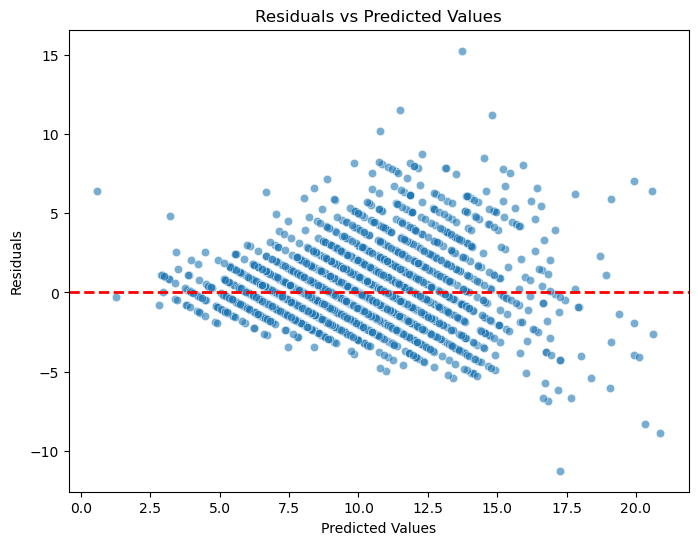

Shapiro-Wilk Test: Statistic=0.935, p-value=0.000


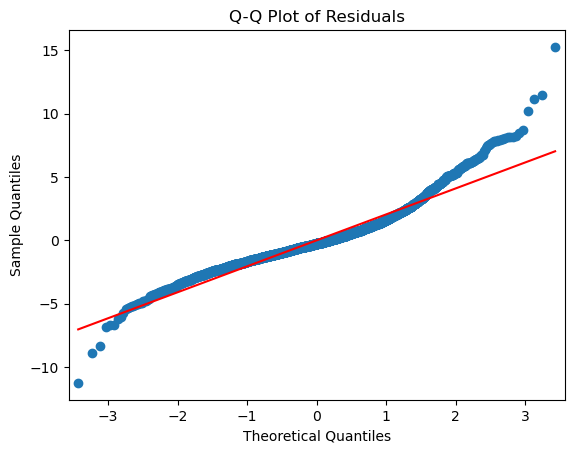

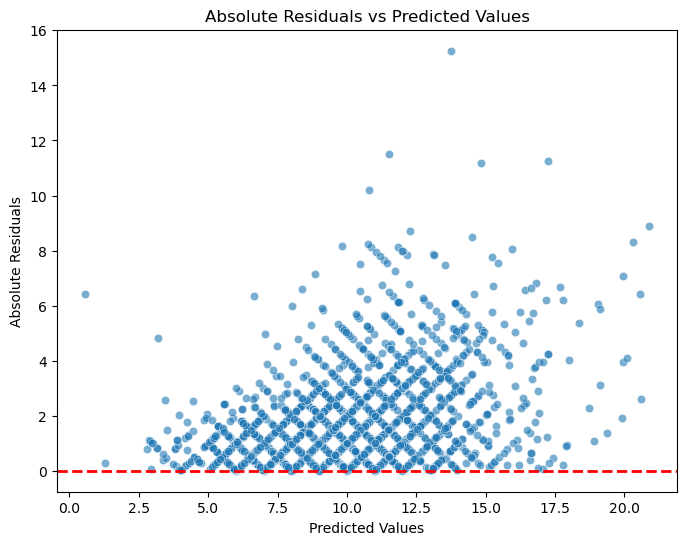

C:\Users\JasHa\anaconda3\envs\ISLP\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Variance Inflation Factor (VIF):
   Feature     VIF
0       x0   56.06
1       x1   52.39
2       x2   10.66
3       x3  319.00
4       x4   85.40
5       x5   50.66
6       x6   56.58
7       x7     inf
8       x8     inf
9     x0^2  963.78
10   x0 x1 2609.56
11   x0 x2  547.88
12   x0 x3 7090.12
13   x0 x4 1830.01
14   x0 x5  927.26
15   x0 x6 1386.78
16   x0 x7   88.25
17   x0 x8   52.39
18    x1^2  679.03
19   x1 x2  542.94
20   x1 x3 7422.36
21   x1 x4 1909.31
22   x1 x5  991.63
23   x1 x6 1436.06
24   x1 x7   90.06
25   x1 x8   51.97
26    x2^2   13.12
27   x2 x3  818.50
28   x2 x4  224.13
29   x2 x5  151.31
30   x2 x6  103.62
31   x2 x7   16.11
32   x2 x8    9.09
33    x3^2 1607.24
34   x3 x4 2383.58
35   x3 x5 1327.12
36   x3 x6 1205.30
37   x3 x7  308.26
38   x3 x8  142.58
39    x4^2  362.00
40   x4 x5  387.34
41   x4 x6  420.01
42   x4 x7   80.71
43   x4 x8   38.18
44    x5^2  112.11
45   x5 x6  230.30
46   x5 x7   46.66
47   x5 x8   20.09
48    x6^2  105.99
49   x6 x7   62.

In [38]:
from sklearn.model_selection import cross_val_score, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
import statsmodels.api as sm
import seaborn as sns

X = data.drop(columns=['Rings'])
y = data['Rings']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                                                    
# Standardize the features (important for polynomial regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial transformation (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train a linear regression model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# AIC and BIC
X_train_poly_sm = sm.add_constant(X_train_poly)  # Add constant for statsmodels
ols_model = sm.OLS(y_train, X_train_poly_sm).fit()
aic = ols_model.aic
bic = ols_model.bic

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_poly, y_train, cv=kf, scoring='r2')

# Residual Analysis
residuals = y_train - y_train_pred

# Residual Plots
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Normality of Residuals (Shapiro-Wilk Test and Q-Q Plot)
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}")
qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Homoscedasticity Check
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred, y=np.abs(residuals), alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Absolute Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Absolute Residuals")
plt.show()

# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame({
    "Feature": poly.get_feature_names_out(),
    "VIF": [variance_inflation_factor(X_train_poly, i) for i in range(X_train_poly.shape[1])]
})
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

# Print metrics
print("\nPolynomial Regression Metrics (Degree 2):")
print(f"Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")
print(f"Train R²: {r2_train:.2f}, Test R²: {r2_test:.2f}")
print(f"AIC: {aic:.2f}, BIC: {bic:.2f}")
print(f"Cross-Validation Mean R²: {np.mean(cv_scores):.2f}, Std Dev: {np.std(cv_scores):.2f}")


# Principal Components Regression (PCR)

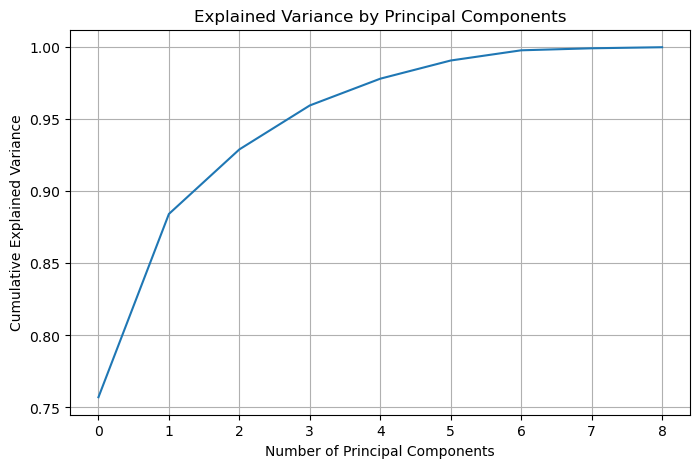

Number of components explaining 95% variance: 4
Train MSE: 6.50493986726839
Test MSE: 6.332910096647643
R²: 0.41498501460980575


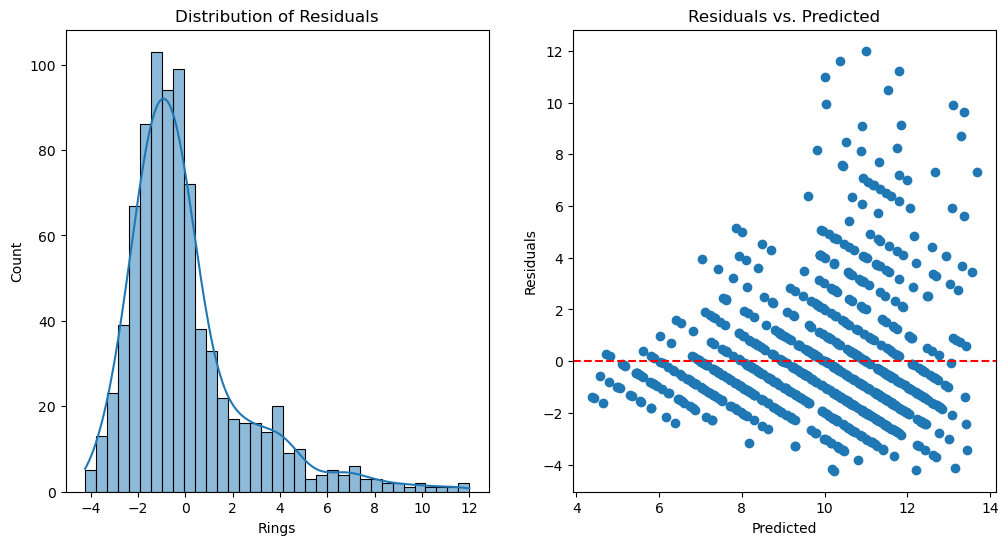

In [44]:

# Step 1: Load the dataset
data = pd.read_csv('abalone.csv')  # Replace with correct path
X = data.drop(columns=['Rings'])
y = data['Rings']

# Handle categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 2: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

# Select number of components that explain ~95% variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"R²: {r2}")

# Step 4: Investigate Assumptions
# Residual plots
residuals = y_test - y_pred_test

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()

# Step 5: Prepare Submission
# Load the test dataset
test_data = pd.read_csv('test.csv')  # Replace with the correct path

# Drop unwanted columns
#test_data = test_data.drop(columns=['id'], errors='ignore')  # Drop 'id' if it exists

# Apply the same preprocessing (e.g., one-hot encoding)
X_kaggle = pd.get_dummies(test_data, drop_first=True)

# Ensure the same feature order as training data
X_kaggle = X_kaggle.reindex(columns=X.columns, fill_value=0)

# Step 2: Scale the test data
X_kaggle_scaled = scaler.transform(X_kaggle)

# Step 3: Apply PCA
X_kaggle_pca = pca.transform(X_kaggle_scaled)

# Step 4: Predict and prepare submission
kaggle_predictions = model.predict(X_kaggle_pca)
# Create submission file
submission = pd.DataFrame({'id': test_data['id'], 'Rings': kaggle_predictions})
submission.to_csv('submission_PCR.csv', index=False)

